In [1]:
import gensim
import gensim.downloader
model = gensim.downloader.load("glove-wiki-gigaword-50")

In [2]:
model["tower"].shape

model.get_normed_vectors().shape

(400000, 50)

In [3]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

man = model["man"]
woman = model["woman"]

# let's learn a projection down to three dimensions using the full dataset in model.get_normed_vectors()
pca = PCA(n_components=3)
vectors = model.get_normed_vectors()
vectors_3d = pca.fit_transform(vectors)

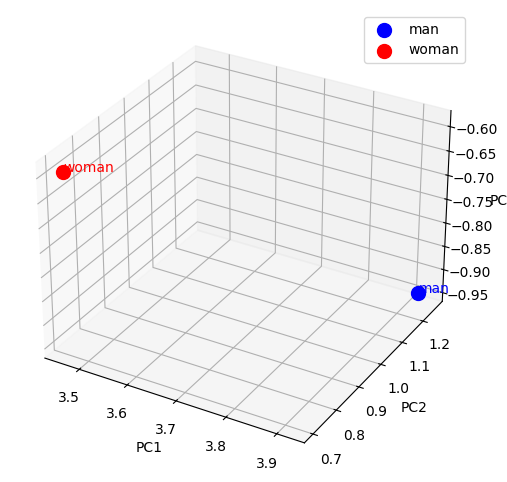

In [4]:
import matplotlib.pyplot as plt

# Transform 'man' and 'woman' vectors to 3D using the fitted PCA
man_3d = pca.transform(man.reshape(1, -1))[0]
woman_3d = pca.transform(woman.reshape(1, -1))[0]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(man_3d[0], man_3d[1], man_3d[2], color='blue', label='man', s=100)
ax.scatter(woman_3d[0], woman_3d[1], woman_3d[2], color='red', label='woman', s=100)

# Annotate points
ax.text(man_3d[0], man_3d[1], man_3d[2], 'man', color='blue')
ax.text(woman_3d[0], woman_3d[1], woman_3d[2], 'woman', color='red')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

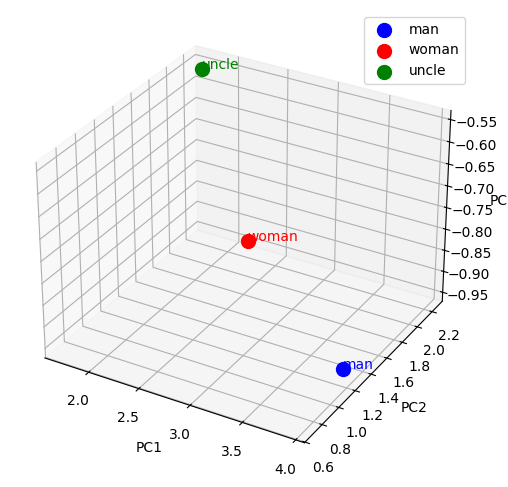

In [5]:
# Get the vector for 'uncle'
uncle = model["uncle"]

# Project 'uncle' to 3D using the fitted PCA
uncle_3d = pca.transform(uncle.reshape(1, -1))[0]

# Plot 'uncle', 'man', and 'woman' in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(man_3d[0], man_3d[1], man_3d[2], color='blue', label='man', s=100)
ax.scatter(woman_3d[0], woman_3d[1], woman_3d[2], color='red', label='woman', s=100)
ax.scatter(uncle_3d[0], uncle_3d[1], uncle_3d[2], color='green', label='uncle', s=100)

ax.text(man_3d[0], man_3d[1], man_3d[2], 'man', color='blue')
ax.text(woman_3d[0], woman_3d[1], woman_3d[2], 'woman', color='red')
ax.text(uncle_3d[0], uncle_3d[1], uncle_3d[2], 'uncle', color='green')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

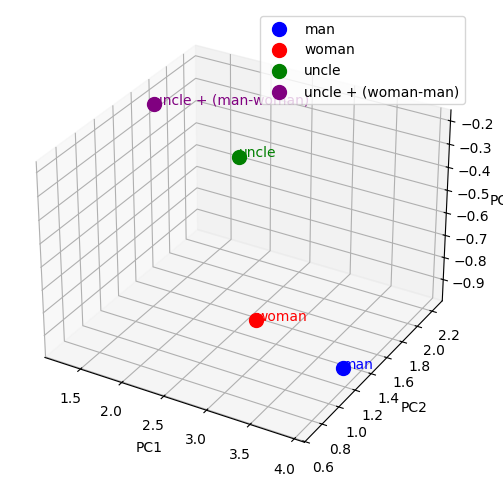

In [6]:
# Compute the vector from woman to man in high dimensions
woman_to_man = woman - man

# Add this vector to 'uncle' to get a new point
uncle_plus_w2m = uncle + woman_to_man

# Project the new point to 3D using the fitted PCA
uncle_plus_w2m_3d = pca.transform(uncle_plus_w2m.reshape(1, -1))[0]

# Plot all points in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(man_3d[0], man_3d[1], man_3d[2], color='blue', label='man', s=100)
ax.scatter(woman_3d[0], woman_3d[1], woman_3d[2], color='red', label='woman', s=100)
ax.scatter(uncle_3d[0], uncle_3d[1], uncle_3d[2], color='green', label='uncle', s=100)
ax.scatter(uncle_plus_w2m_3d[0], uncle_plus_w2m_3d[1], uncle_plus_w2m_3d[2], color='purple', label='uncle + (woman-man)', s=100)

ax.text(man_3d[0], man_3d[1], man_3d[2], 'man', color='blue')
ax.text(woman_3d[0], woman_3d[1], woman_3d[2], 'woman', color='red')
ax.text(uncle_3d[0], uncle_3d[1], uncle_3d[2], 'uncle', color='green')
ax.text(uncle_plus_w2m_3d[0], uncle_plus_w2m_3d[1], uncle_plus_w2m_3d[2], 'uncle + (man-woman)', color='purple')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

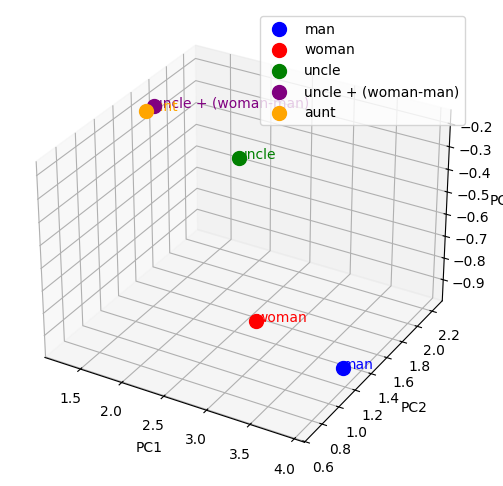

In [7]:
# Get the vector for 'aunt'
aunt = model["aunt"]

# Project 'aunt' to 3D using the fitted PCA
aunt_3d = pca.transform(aunt.reshape(1, -1))[0]

# Plot 'aunt' along with the other points
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(man_3d[0], man_3d[1], man_3d[2], color='blue', label='man', s=100)
ax.scatter(woman_3d[0], woman_3d[1], woman_3d[2], color='red', label='woman', s=100)
ax.scatter(uncle_3d[0], uncle_3d[1], uncle_3d[2], color='green', label='uncle', s=100)
ax.scatter(uncle_plus_w2m_3d[0], uncle_plus_w2m_3d[1], uncle_plus_w2m_3d[2], color='purple', label='uncle + (woman-man)', s=100)
ax.scatter(aunt_3d[0], aunt_3d[1], aunt_3d[2], color='orange', label='aunt', s=100)

ax.text(man_3d[0], man_3d[1], man_3d[2], 'man', color='blue')
ax.text(woman_3d[0], woman_3d[1], woman_3d[2], 'woman', color='red')
ax.text(uncle_3d[0], uncle_3d[1], uncle_3d[2], 'uncle', color='green')
ax.text(uncle_plus_w2m_3d[0], uncle_plus_w2m_3d[1], uncle_plus_w2m_3d[2], 'uncle + (woman-man)', color='purple')
ax.text(aunt_3d[0], aunt_3d[1], aunt_3d[2], 'aunt', color='orange')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

In [8]:
import plotly.graph_objs as go

# Prepare data for Plotly
points = {
    'man': (man_3d, 'blue'),
    'woman': (woman_3d, 'red'),
    'uncle': (uncle_3d, 'green'),
    'uncle + (woman-man)': (uncle_plus_w2m_3d, 'purple'),
    'aunt': (aunt_3d, 'orange')
}

data = []
for label, (coords, color) in points.items():
    data.append(go.Scatter3d(
        x=[coords[0]], y=[coords[1]], z=[coords[2]],
        mode='markers+text',
        marker=dict(size=8, color=color),
        text=[label],
        textposition='top center',
        name=label
    ))

layout = go.Layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    legend=dict(x=0, y=1)
)

fig_plotly = go.Figure(data=data, layout=layout)
fig_plotly.show()